In [1]:

import sys
import os
sys.path.insert(0, os.path.abspath('C:\\Users\\Joey\\PycharmProjects\\Automata-Testing'))
import reworked_graph
import copy
from tulip.transys import WeightedKripkeStructure as WKS
from tulip.transys.automata import WeightedFiniteStateAutomaton as WFA
from tulip.spec.prioritized_safety import PrioritizedSpecification
from tulip.transys.compositions import synchronous_parallel
from tulip.transys.mathset import PowerSet
from tulip.mvp import solve as solve_mvp
#graph = reworked_graph.ReworkedGraph({"a": 1, "b" : 1, "c" : 1}, 2, ["a", "b","c"], [0, 4, 1])
graph = reworked_graph.ReworkedGraph({"a": 0, "b" : 1}, 2, ["a","b"], [1,1])

In [2]:
    ts = WKS()
    ts.states.add_from(graph.states)
    ts.states.initial.add(graph.base_state)

    for transition in graph.transitions:
        ts.transitions.add(transition[0], transition[2], {"cost": 1})

    ts.atomic_propositions.add("VALID")
    ts.atomic_propositions.add("WRONG_PORT")
    ts.atomic_propositions.add("OVERFLOWED_PORT")
    ts.atomic_propositions.add("FINISH")

    for s in graph.states:
        ts.states[s]["ap"] = set(s.labels)

    fa0 = WFA()
    fa0.atomic_propositions.add_from(ts.atomic_propositions)
    fa0.states.add_from({"q0"})
    fa0.states.initial.add("q0")
    fa0.states.accepting.add("q0")
    
    ap_without_valid = copy.deepcopy(fa0.atomic_propositions)
    ap_without_valid.remove("VALID")
    valid = {"VALID"}
    
    for letter in PowerSet(ap_without_valid): #union of everything with valid
        fa0.transitions.add("q0", "q0", letter=set(letter) | valid) 
        
    fa1 = WFA()
    fa1.atomic_propositions.add_from(ts.atomic_propositions)
    fa1.states.add_from({"q0"})
    fa1.states.initial.add("q0")
    fa1.states.accepting.add("q0")
    
    ap_without_wrong_port = copy.deepcopy(fa1.atomic_propositions)
#     ap_without_wrong_port.remove("WRONG_PORT")
    wrong_port = {"WRONG_PORT"}
    
    for letter in PowerSet(ap_without_wrong_port):
        fa1.transitions.add("q0", "q0", letter=set(letter) - wrong_port)
        

    fa2 = WFA()
    fa2.atomic_propositions.add_from(ts.atomic_propositions)
    fa2.states.add_from({"q0"})
    fa2.states.initial.add("q0")
    fa2.states.accepting.add("q0")
    
    ap_without_port_overflow = copy.deepcopy(fa2.atomic_propositions)
    ap_without_port_overflow.remove("OVERFLOWED_PORT")
    
    for letter in PowerSet(ap_without_port_overflow):
        fa2.transitions.add("q0", "q0", letter=letter)
        
    spec = PrioritizedSpecification()
    spec.add_rule(fa0, priority=1, level=0)
    spec.add_rule(fa1, priority=1, level=1)
    spec.add_rule(fa2, priority=1, level=1)
#     fa1.atomic_propositions.add_from(ts.atomic_propositions)
#     fa1.states.add_from({"q0"})
#     fa1.states.initial.add("q0")
#     fa1.states.accepting.add("q0")

#     ap_full_sat_not_valid = copy.deepcopy(fa1.atomic_propositions)
#     ap_full_sat_not_valid.remove("SEMI_SAT")
#     ap_full_sat_not_valid.remove("VALID")
#     transition_letters_1 = set(PowerSet(ap_full_sat_not_valid))
#     for letter in transition_letters_1:
#         fa1.transitions.add("q0", "q0", letter=letter)


    
    
    %timeit (cost, state_path, product_path, wpa) = solve_mvp(ts, "FINISH", spec)
    (cost, state_path, product_path, wpa) = solve_mvp(ts, "FINISH", spec)
    
    print("Optimal cost: {}".format(cost))
    print("State path: {}".format(state_path))
    print("Product path: {}".format(product_path))

Same labeled transition:
from_state---[label]---> to_state
already exists, where:
	 from_state = q0
	 to_state = q0
	 label = TypedDict({'letter': set()})

Same labeled transition:
from_state---[label]---> to_state
already exists, where:
	 from_state = q0
	 to_state = q0
	 label = TypedDict({'letter': {'OVERFLOWED_PORT'}})

Same labeled transition:
from_state---[label]---> to_state
already exists, where:
	 from_state = q0
	 to_state = q0
	 label = TypedDict({'letter': {'VALID'}})

Same labeled transition:
from_state---[label]---> to_state
already exists, where:
	 from_state = q0
	 to_state = q0
	 label = TypedDict({'letter': {'FINISH'}})

Same labeled transition:
from_state---[label]---> to_state
already exists, where:
	 from_state = q0
	 to_state = q0
	 label = TypedDict({'letter': {'OVERFLOWED_PORT', 'VALID'}})

Same labeled transition:
from_state---[label]---> to_state
already exists, where:
	 from_state = q0
	 to_state = q0
	 label = TypedDict({'letter': {'OVERFLOWED_PORT', 'FINISH

9.69 ms ± 90.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Optimal cost: [0, 1, 1]
State path: [State currently has requests :: ('a', 'b') Time states of :: (1, 1) Port states of :: {'a': 0, 'b': 1} Labels :: ['VALID']  
, State currently has requests :: () Time states of :: () Port states of :: {'a': -1, 'b': 0} Labels :: ['VALID', 'FINISH', 'OVERFLOWED_PORT']  
]
Product path: [('null', ('q0', 'q0', 'q0')), (State currently has requests :: ('a', 'b') Time states of :: (1, 1) Port states of :: {'a': 0, 'b': 1} Labels :: ['VALID']  
, ('q0', 'q0', 'q0')), (State currently has requests :: () Time states of :: () Port states of :: {'a': -1, 'b': 0} Labels :: ['VALID', 'FINISH', 'OVERFLOWED_PORT']  
, ('q0', 'q0', 'q0'))]


hello


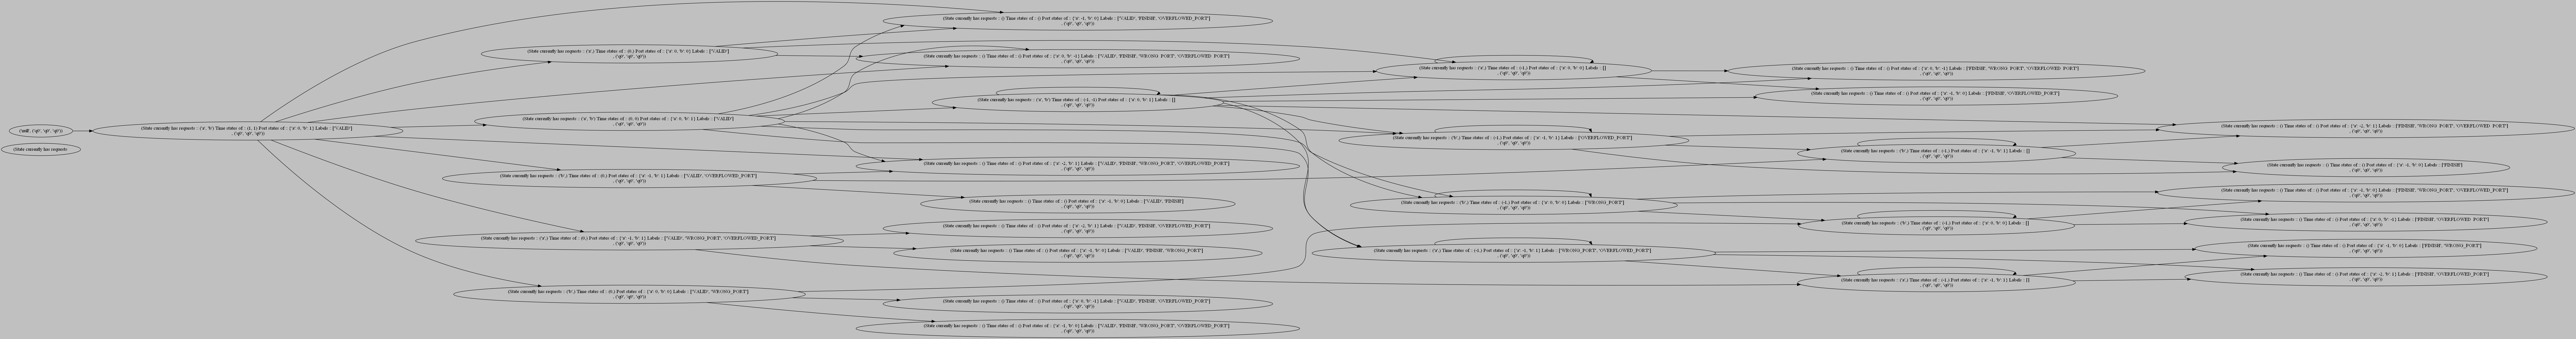

True

In [3]:
wpa.plot()

In [4]:
#     fa1 = WFA()
#     fa1.atomic_propositions.add_from(ts.atomic_propositions)
#     fa1.states.add_from({"q0"})
#     fa1.states.initial.add("q0")
#     fa1.states.accepting.add("q0")

#     ap_full_sat_not_valid = copy.deepcopy(fa1.atomic_propositions)
#     ap_full_sat_not_valid.remove("SEMI_SAT")
#     ap_full_sat_not_valid.remove("VALID")
#     transition_letters_1 = set(PowerSet(ap_full_sat_not_valid))
#     for letter in transition_letters_1:
#         fa1.transitions.add("q0", "q0", letter=letter)
        
#     fa2 = WFA()
#     fa2.atomic_propositions.add_from(ts.atomic_propositions)
#     fa2.states.add_from({"q0"})
#     fa2.states.initial.add("q0")
#     fa2.states.accepting.add("q0")

#     ap_valid = copy.deepcopy(fa2.atomic_propositions)
#     ap_valid.remove("FULL_SAT")
#     ap_valid.remove("SEMI_SAT")
#     transition_letters_2 = set(PowerSet(ap_valid))
#     for letter in transition_letters_2:
#         fa2.transitions.add("q0", "q0", letter=letter)
        
#     spec = PrioritizedSpecification()
#     spec.add_rule(fa1, priority=2, level=0)
#     spec.add_rule(fa2, priority=1, level=0)

#     fa1 = WFA()
#     fa1.atomic_propositions.add_from(ts.atomic_propositions)
#     fa1.states.add_from({"q0"})
#     fa1.states.initial.add("q0")
#     fa1.states.accepting.add("q0")